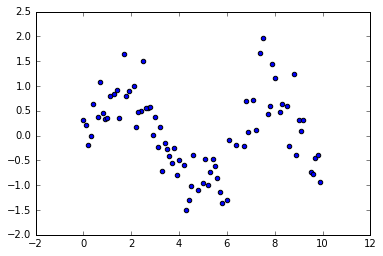

In [325]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

%matplotlib inline

#generating some fake data
N=100
X=np.array(range(N),dtype=np.float32)/(N/10)
X=X[:,np.newaxis]
Y=np.sin(X.squeeze())+np.random.normal(0, 0.4, N)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  train_size=0.8,  test_size=0.2)

plt.scatter(X_train[:,0],Y_train)
plt.show()

In [326]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.regularizers import l2, activity_l2
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(output_dim=50, input_dim=X_train.shape[1]))
model.add(Activation("tanh"))
model.add(Dense(output_dim=1))

model.compile(loss='mse', optimizer='sgd')


In [327]:
model.fit(X_train, Y_train, nb_epoch=10, batch_size=32, validation_split=0.2,verbose=1)#,callbacks=[checkpointer,stopping])
print(model.evaluate(X_train,Y_train,verbose=0),model.evaluate(X_test,Y_test,verbose=0))


Train on 64 samples, validate on 16 samples
Epoch 1/10
64/64 [==============================] - 0s - loss: 0.6897 - val_loss: 0.4745
Epoch 2/10
64/64 [==============================] - 0s - loss: 0.6506 - val_loss: 0.4625
Epoch 3/10
64/64 [==============================] - 0s - loss: 0.6432 - val_loss: 0.5100
Epoch 4/10
64/64 [==============================] - 0s - loss: 0.6332 - val_loss: 0.4963
Epoch 5/10
64/64 [==============================] - 0s - loss: 0.6663 - val_loss: 0.5398
Epoch 6/10
64/64 [==============================] - 0s - loss: 0.6807 - val_loss: 0.5476
Epoch 7/10
64/64 [==============================] - 0s - loss: 0.6320 - val_loss: 0.4983
Epoch 8/10
64/64 [==============================] - 0s - loss: 0.6332 - val_loss: 0.5147
Epoch 9/10
64/64 [==============================] - 0s - loss: 0.6577 - val_loss: 0.5460
Epoch 10/10
64/64 [==============================] - 0s - loss: 0.6544 - val_loss: 0.5434
(0.60845584869384761, 0.62635195255279541)


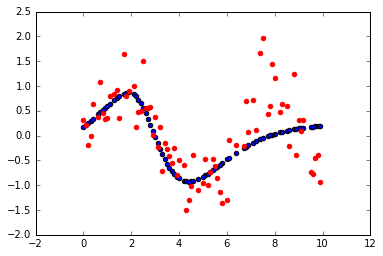

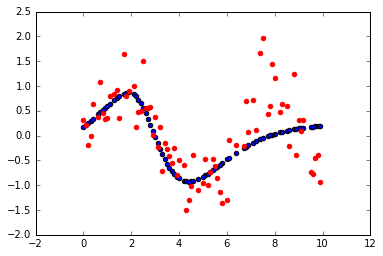

In [328]:
from IPython import display
from time import sleep
import pylab
for i in range(100):
    plt.clf()

    model.fit(X_train, Y_train, nb_epoch=100, batch_size=32,verbose=0)
        
    fig,ax = plt.subplots(1,1)
    ax.scatter(X_train[:,0],model.predict(X_train))
    ax.scatter(X_train[:,0],Y_train,color="red")
    
    display.clear_output(wait=True)
    display.display(pylab.gcf())
    

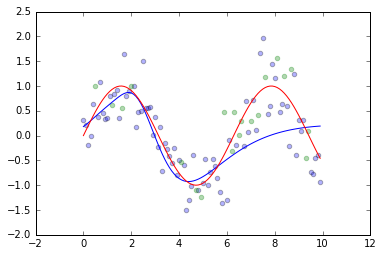

In [329]:
X_eval=np.array(range(100),dtype=np.float32)/10
plt.scatter(X_train,Y_train,alpha=0.3)
plt.scatter(X_test,Y_test,alpha=0.3,color="green")
plt.plot(X_eval,model.predict(X_eval))
plt.plot(X_eval,np.sin(X_eval),color="red")
plt.show()

In [330]:
#adding features
X2=np.concatenate((X,X**2,X**3,X**4),axis=1)
X2=preprocessing.scale(X2)

X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, train_size=0.8, test_size=0.2)

In [331]:
model = Sequential()
model.add(Dense(output_dim=50, input_dim=X_train.shape[1]))
model.add(Activation("tanh"))
model.add(Dense(output_dim=50, input_dim=X_train.shape[1]))
model.add(Activation("tanh"))
model.add(Dense(output_dim=1))

model.compile(loss='mse', optimizer='sgd')

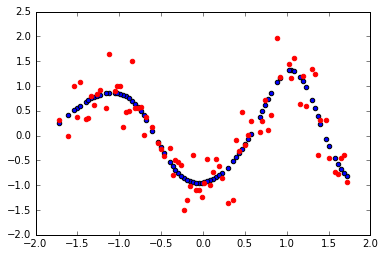

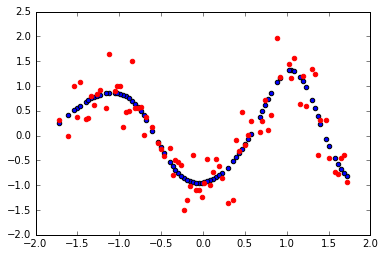

In [332]:
for i in range(100):
    plt.clf()
    
    fig,ax = plt.subplots(1,1)
    ax.scatter(X_train[:,0],model.predict(X_train))
    ax.scatter(X_train[:,0],Y_train,color="red")
    
    display.clear_output(wait=True)
    display.display(pylab.gcf())
    
    model.fit(X_train, Y_train, nb_epoch=100, batch_size=32, validation_data=(X_test, Y_test),verbose=0)#,callbacks=[checkpointer,stopping])
    

In [333]:
print("train error: ", model.evaluate(X_train,Y_train,verbose=0),
          "test error: ",model.evaluate(X_test,Y_test,verbose=0))

('train error: ', 0.13510378301143647, 'test error: ', 0.3162657618522644)


In [334]:
X3=np.concatenate((X2,np.random.random((X.shape[0],10))),axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, train_size=0.8, test_size=0.2)
print(X3[:5,:])

[[-1.71481597 -1.11180842 -0.8780629  -0.74715114  0.57594917  0.77487435
   0.02687604  0.10597986  0.18034419  0.2699689   0.7250761   0.24303127
   0.93145226  0.73437878]
 [-1.68017328 -1.11146986 -0.87805933 -0.74715108  0.46899756  0.13412044
   0.1186542   0.93870885  0.02213236  0.3512613   0.95720254  0.42259592
   0.64388741  0.73980524]
 [-1.64553058 -1.11045396 -0.87803429 -0.74715054  0.08421749  0.37661442
   0.18734569  0.02907809  0.83684014  0.47730518  0.24344907  0.4757928
   0.26956112  0.6617423 ]
 [-1.61088765 -1.10876095 -0.87796617 -0.74714804  0.97016363  0.65556788
   0.21205424  0.38372344  0.2641903   0.82447208  0.40410444  0.82003573
   0.00961033  0.98881852]
 [-1.57624495 -1.10639071 -0.8778336  -0.7471413   0.02866407  0.84378759
   0.88763057  0.27053075  0.28265142  0.39068705  0.43866895  0.26229371
   0.90245775  0.67412361]]


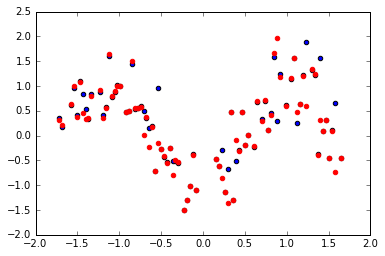

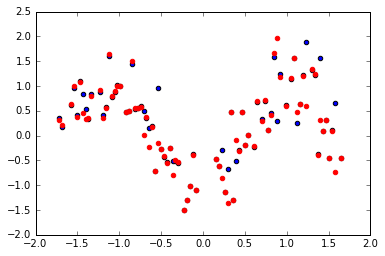

In [335]:
model = Sequential()
model.add(Dense(output_dim=50, input_dim=X_train.shape[1]))
model.add(Activation("tanh"))
model.add(Dense(output_dim=50))
model.add(Activation("tanh"))
model.add(Dense(output_dim=1))

model.compile(loss='mse', optimizer='sgd')

for i in range(100):
    plt.clf()
    
    fig,ax = plt.subplots(1,1)
    ax.scatter(X_train[:,0],model.predict(X_train))
    ax.scatter(X_train[:,0],Y_train,color="red")
    
    display.clear_output(wait=True)
    display.display(pylab.gcf())
    
    model.fit(X_train, Y_train, nb_epoch=100, batch_size=32, validation_split=0.2,verbose=0,callbacks=callbacks)
    

In [336]:
print("train error: ", model.evaluate(X_train,Y_train,verbose=0),
          "test error: ",model.evaluate(X_test,Y_test,verbose=0))

('train error: ', 0.13568719341419638, 'test error: ', 0.65749675035476685)


In [337]:
#Ploting the learning curve
from keras.callbacks import History

model = Sequential()
model.add(Dense(output_dim=50, input_dim=X_train.shape[1]))
model.add(Activation("tanh"))
model.add(Dense(output_dim=50))
model.add(Activation("tanh"))
model.add(Dense(output_dim=1))
model.compile(loss='mse', optimizer='sgd', metrics=[MSE])

callbacks=[History()]
hist=model.fit(X_train, Y_train, nb_epoch=10000, batch_size=32, validation_split=0.2,verbose=0, callbacks=callbacks)
print("train error: ", model.evaluate(X_train,Y_train,verbose=0),
          "test error: ",model.evaluate(X_test,Y_test,verbose=0))

('train error: ', [0.1567253089218866, 0.1567253089218866], 'test error: ', [0.66939467191696167, 0.66939467191696167])


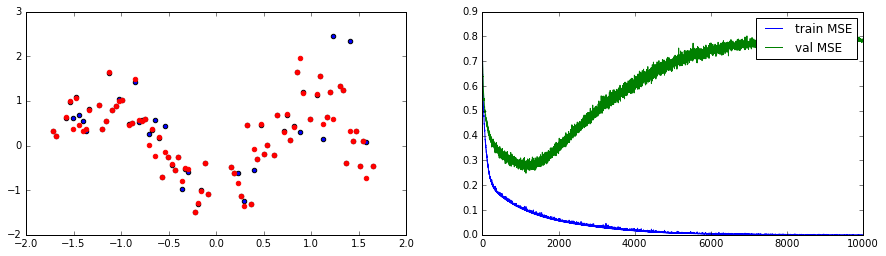

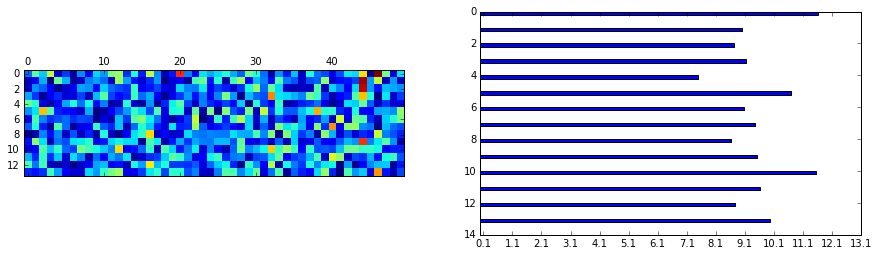

In [338]:
pylab.rcParams['figure.figsize'] = (15, 4)

fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.scatter(X_train[:,0],model.predict(X_train))
ax1.scatter(X_train[:,0],Y_train,color="red")
ax2.plot(hist.history['mean_squared_error'],label="train MSE")
ax2.plot(hist.history['val_mean_squared_error'],label="val MSE")
plt.legend()
plt.show()

w1, b1=model.layers[0].get_weights()
covweight=np.abs(w1).sum(axis=1)

fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.matshow(np.abs(w1))
ind=np.arange(len(covweight))
width=0.2
ax2.barh(ind,covweight,width)
ax2.set_xticks(ind + width/2)
ax2.invert_yaxis()
plt.show()

## Regularization

In [339]:
from keras.regularizers import l1, l2
from keras.metrics import MSE

model = Sequential()
model.add(Dense(output_dim=50, input_dim=X_train.shape[1], W_regularizer=l1(0.01)))
model.add(Activation("tanh"))
model.add(Dense(output_dim=50, W_regularizer=l1(0.01)))
model.add(Activation("tanh"))
model.add(Dense(output_dim=1))

model.compile(loss='mse', optimizer='sgd', metrics=[MSE])

callbacks=[History()]
hist=model.fit(X_train, Y_train, nb_epoch=10000, batch_size=32, validation_split=0.2,verbose=0, callbacks=callbacks)
print("train error: ", model.evaluate(X_train,Y_train,verbose=0),
          "test error: ",model.evaluate(X_test,Y_test,verbose=0))

('train error: ', [0.11711340248584748, 0.11711340248584748], 'test error: ', [0.26704207062721252, 0.26704207062721252])


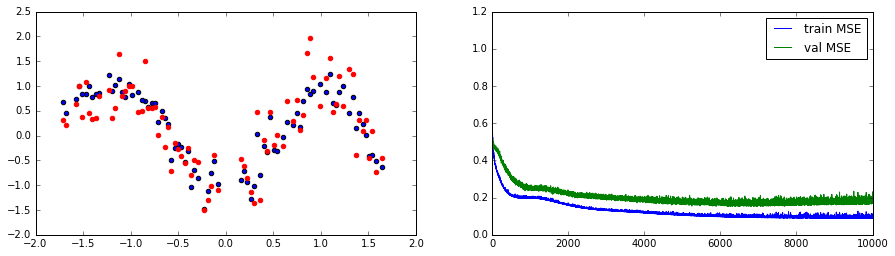

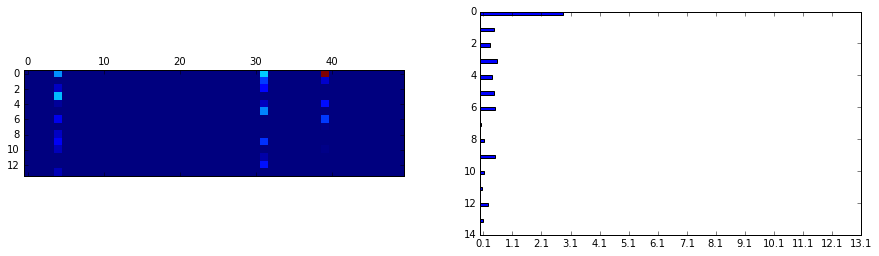

In [340]:
pylab.rcParams['figure.figsize'] = (15, 4)

fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.scatter(X_train[:,0],model.predict(X_train))
ax1.scatter(X_train[:,0],Y_train,color="red")
ax2.plot(hist.history['mean_squared_error'],label="train MSE")
ax2.plot(hist.history['val_mean_squared_error'],label="val MSE")
plt.legend()
plt.show()

w1, b1=model.layers[0].get_weights()
covweight=np.abs(w1).sum(axis=1)

fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.matshow(np.abs(w1))
ind=np.arange(len(covweight))
width=0.2
ax2.barh(ind,covweight,width)
ax2.set_xticks(ind + width/2)
ax2.invert_yaxis()
plt.show()

## Droupout

In [341]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(output_dim=50, input_dim=X_train.shape[1]))
model.add(Activation("tanh"))
model.add(Dropout(0.5))
model.add(Dense(output_dim=50))
model.add(Activation("tanh"))
model.add(Dropout(0.5))
model.add(Dense(output_dim=1))

model.compile(loss='mse', optimizer='sgd', metrics=[MSE])

callbacks=[History()]
hist=model.fit(X_train, Y_train, nb_epoch=10000, batch_size=32, validation_split=0.2,verbose=0, callbacks=callbacks)
print("train error: ", model.evaluate(X_train,Y_train,verbose=0),
          "test error: ",model.evaluate(X_test,Y_test,verbose=0))

('train error: ', [0.18482612371444701, 0.18482612371444701], 'test error: ', [0.53222888708114624, 0.53222888708114624])


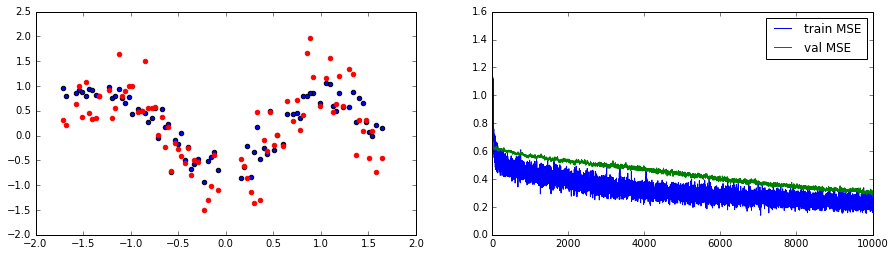

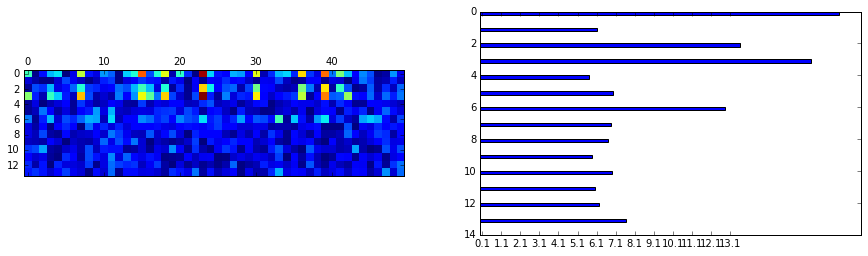

In [342]:
pylab.rcParams['figure.figsize'] = (15, 4)

fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.scatter(X_train[:,0],model.predict(X_train))
ax1.scatter(X_train[:,0],Y_train,color="red")
ax2.plot(hist.history['mean_squared_error'],label="train MSE")
ax2.plot(hist.history['val_mean_squared_error'],label="val MSE")
plt.legend()
plt.show()

w1, b1=model.layers[0].get_weights()
covweight=np.abs(w1).sum(axis=1)

fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.matshow(np.abs(w1))
ind=np.arange(len(covweight))
width=0.2
ax2.barh(ind,covweight,width)
ax2.set_xticks(ind + width/2)
ax2.invert_yaxis()
plt.show()

## Noise layer

In [343]:
from keras.layers.noise import GaussianNoise

model = Sequential()
model.add(GaussianNoise(0.3,input_shape=(X_train.shape[1:])))
model.add(Dense(output_dim=50, input_dim=X_train.shape[1]))
model.add(Activation("tanh"))
model.add(Dropout(0.2))
model.add(Dense(output_dim=50))
model.add(Activation("tanh"))
model.add(Dropout(0.2))
model.add(Dense(output_dim=1))

model.compile(loss='mse', optimizer='sgd', metrics=[MSE])

callbacks=[History()]
hist=model.fit(X_train, Y_train, nb_epoch=10000, batch_size=32, validation_split=0.2,verbose=0, callbacks=callbacks)
print("train error: ", model.evaluate(X_train,Y_train,verbose=0),
          "test error: ",model.evaluate(X_test,Y_test,verbose=0))



('train error: ', [0.18086135983467103, 0.18086135983467103], 'test error: ', [0.35272243618965149, 0.35272243618965149])


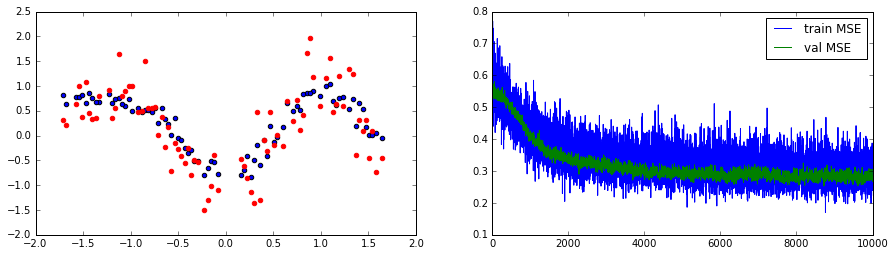

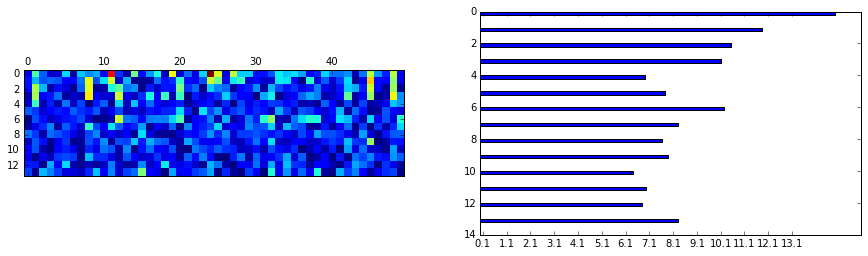

In [344]:
pylab.rcParams['figure.figsize'] = (15, 4)

fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.scatter(X_train[:,0],model.predict(X_train))
ax1.scatter(X_train[:,0],Y_train,color="red")
ax2.plot(hist.history['mean_squared_error'],label="train MSE")
ax2.plot(hist.history['val_mean_squared_error'],label="val MSE")
plt.legend()
plt.show()

w1, b1=model.layers[1].get_weights()
covweight=np.abs(w1).sum(axis=1)

fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.matshow(np.abs(w1))
ind=np.arange(len(covweight))
width=0.2
ax2.barh(ind,covweight,width)
ax2.set_xticks(ind + width/2)
ax2.invert_yaxis()
plt.show()

## Reducing the number of parameters

In [345]:
X2=np.concatenate((X,X**2,X**3,X**4),axis=1)
X2=preprocessing.scale(X2)
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, train_size=0.8, test_size=0.2)

model = Sequential()
model.add(Dense(output_dim=20, input_dim=X_train.shape[1]))
model.add(Activation("tanh"))
model.add(Dense(output_dim=1))

model.compile(loss='mse', optimizer='sgd', metrics=[MSE])

callbacks=[History()]
hist=model.fit(X_train, Y_train, nb_epoch=10000, batch_size=32, validation_split=0.2,verbose=0, callbacks=callbacks)
print("train error: ", model.evaluate(X_train,Y_train,verbose=0),
          "test error: ",model.evaluate(X_test,Y_test,verbose=0))

('train error: ', [0.15504647493362428, 0.15504647493362428], 'test error: ', [0.23180179297924042, 0.23180179297924042])


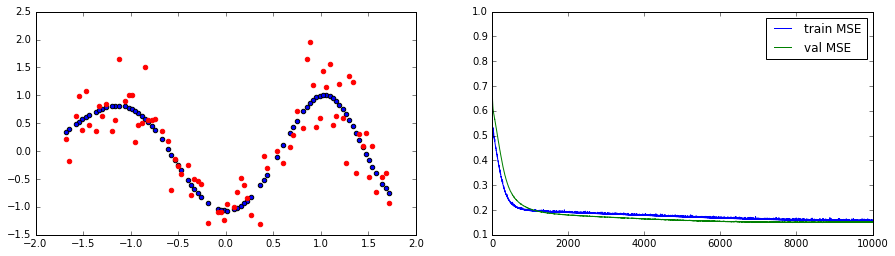

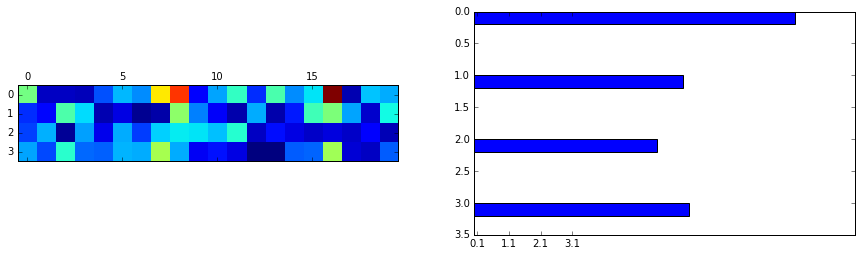

In [346]:
pylab.rcParams['figure.figsize'] = (15, 4)

fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.scatter(X_train[:,0],model.predict(X_train))
ax1.scatter(X_train[:,0],Y_train,color="red")
ax2.plot(hist.history['mean_squared_error'],label="train MSE")
ax2.plot(hist.history['val_mean_squared_error'],label="val MSE")
plt.legend()
plt.show()

w1, b1=model.layers[0].get_weights()
covweight=np.abs(w1).sum(axis=1)

fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.matshow(np.abs(w1))
ind=np.arange(len(covweight))
width=0.2
ax2.barh(ind,covweight,width)
ax2.set_xticks(ind + width/2)
ax2.invert_yaxis()
plt.show()